<a href="https://colab.research.google.com/github/Manideep3183/Data-Analysis-/blob/main/Air_Quality_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset

In [ ]:
df = pd.read_csv('/content/city_day.csv')

#Exploring Dataset




In [ ]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        18265 non-null  object 
 1   Datetime    18265 non-null  object 
 2   PM2.5       18265 non-null  float64
 3   PM10        18265 non-null  float64
 4   NO          18265 non-null  float64
 5   NO2         18265 non-null  float64
 6   NOx         18265 non-null  float64
 7   NH3         18265 non-null  float64
 8   CO          18265 non-null  float64
 9   SO2         18265 non-null  float64
 10  O3          18265 non-null  float64
 11  Benzene     18265 non-null  float64
 12  Toluene     18265 non-null  float64
 13  Xylene      18265 non-null  float64
 14  AQI         18265 non-null  float64
 15  AQI_Bucket  18265 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.2+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,250.597695,299.442491,100.481035,75.415916,125.964079,25.065042,5.002451,49.835839,100.406740,10.070033,15.063365,4.996341,251.111382
std,144.460292,173.479906,57.774795,43.460066,72.403893,14.452019,2.889439,28.988739,57.591436,5.785282,8.619433,2.899152,144.502626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.700000,150.100000,50.600000,37.700000,63.100000,12.600000,2.490000,24.400000,50.600000,5.080000,7.640000,2.510000,125.400000
50%,251.000000,300.300000,100.200000,76.000000,126.200000,25.300000,5.000000,49.900000,100.700000,10.080000,15.130000,4.960000,251.200000
75%,376.200000,450.000000,151.000000,113.200000,188.900000,37.600000,7.510000,75.100000,150.400000,15.110000,22.500000,7.530000,376.400000
max,499.900000,600.000000,200.000000,150.000000,250.000000,50.000000,10.000000,100.000000,200.000000,20.000000,30.000000,10.000000,500.000000


In [ ]:
df.isnull().sum()

,0
City,0
Datetime,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
#Converting Date Columns into Seasons Based on months
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})


In [ ]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Season
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe,2015,1,Winter
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory,2015,1,Winter
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe,2015,1,Winter
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor,2015,1,Winter
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good,2015,1,Winter


In [ ]:
df['Season'].unique()

array(['Winter', 'Summer', 'Monsoon', 'Autumn'], dtype=object)

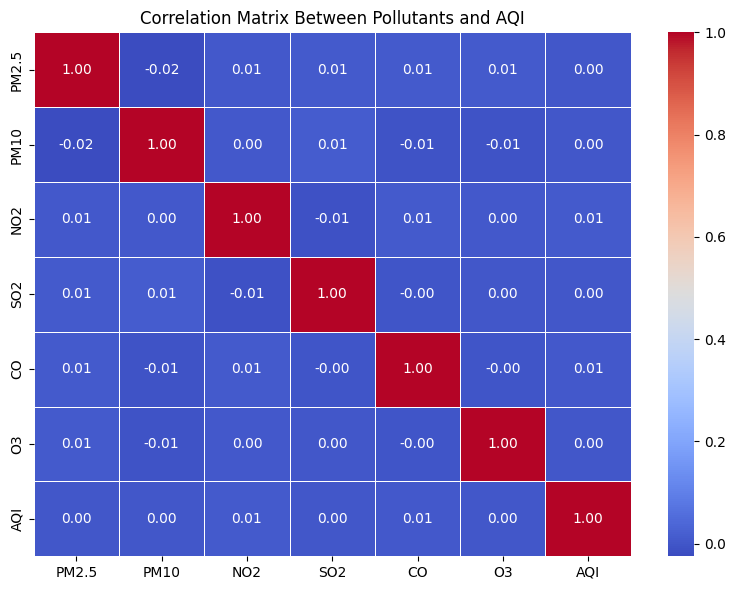

In [ ]:
# Selecting only numeric pollutant columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']
corr_matrix = df[pollutants].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Between Pollutants and AQI")
plt.tight_layout()
plt.show()

#Data Analysis (with Visualization)

 1.Yearly average concentration of PM2.5, PM10, and AQI

Yearly Average PM2.5, PM10, AQI:
            PM2.5        PM10         AQI
Year                                    
2015  251.225315  304.335890  247.418027
2016  244.710601  301.102568  250.105792
2017  251.340438  301.702521  250.886795
2018  249.377699  300.927890  246.312329
2019  251.333151  297.703726  255.429644
2020  256.702459  294.769071  247.307760
2021  252.242521  296.639507  252.502740
2022  255.378137  299.107890  250.474301
2023  248.705151  302.531781  257.006137
2024  244.976284  295.622787  253.676448


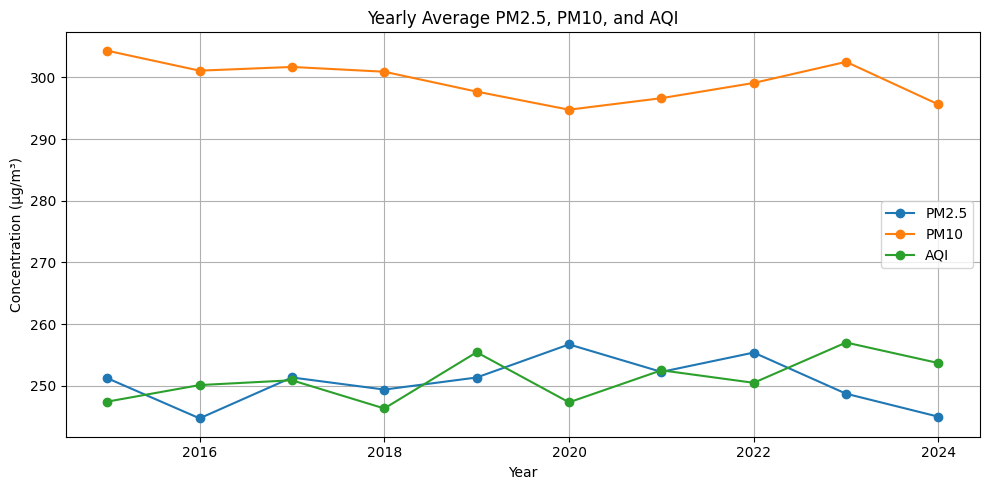

In [ ]:
yearly_avg = df.groupby('Year')[['PM2.5', 'PM10', 'AQI']].mean()
print("Yearly Average PM2.5, PM10, AQI:\n", yearly_avg)

# Visualization
yearly_avg.plot(marker='o', figsize=(10, 5))
plt.title("Yearly Average PM2.5, PM10, and AQI")
plt.ylabel("Concentration (μg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

2. Which city had the highest average PM2.5 across the years?

City with Highest Avg PM2.5: City
Delhi    252.905858
Name: PM2.5, dtype: float64


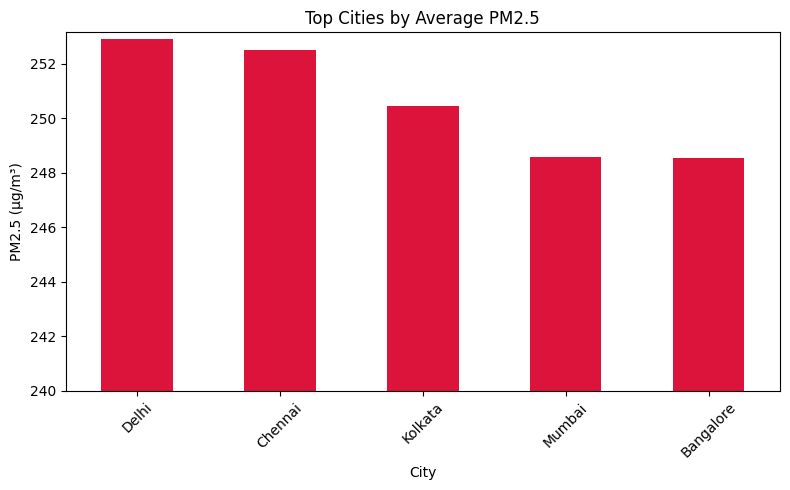

In [ ]:
city_pm25 = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False)
print("City with Highest Avg PM2.5:", city_pm25.head(1))

# Visualization (Top Cities)
ax = city_pm25.head(5).plot(kind='bar', color='crimson', figsize=(8, 5))
plt.title("Top Cities by Average PM2.5")
plt.ylabel("PM2.5 (μg/m³)")
plt.xticks(rotation=45)
plt.ylim(240, city_pm25.head(5).max()*1.001)  # Reduce y-axis scale with padding
plt.tight_layout()
plt.show()


3. Most polluted cities based on *AQI*

Most Polluted Cities by AQI:
 City
Mumbai       253.319053
Delhi        251.496304
Kolkata      250.635396
Chennai      250.338763
Bangalore    249.767397
Name: AQI, dtype: float64


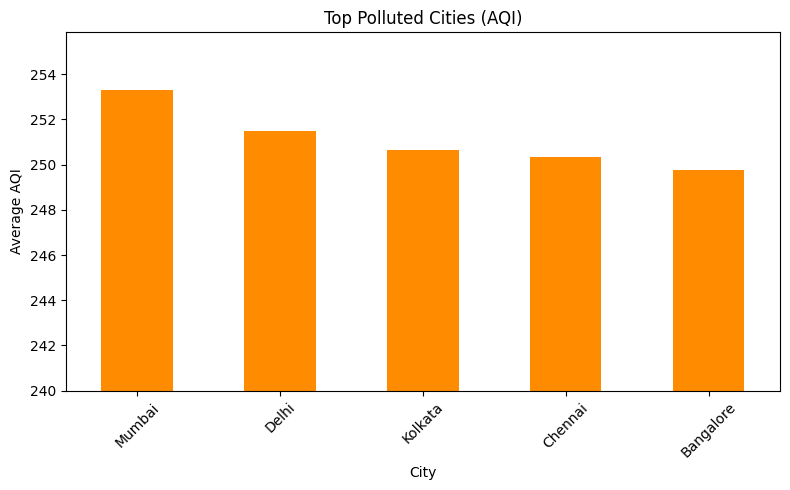

In [ ]:
top_cities_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(5)
print("Most Polluted Cities by AQI:\n", top_cities_aqi)

# Visualization
top_cities_aqi.plot(kind='bar', color='darkorange', figsize=(8, 5))
plt.title("Top Polluted Cities (AQI)")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.ylim(240, top_cities_aqi.head(5).max()*1.01)  # Reduce y-axis scale with padding
plt.tight_layout()
plt.show()


4.  AQI trend over years in Delhi (i.e. from 2015-2024)

AQI Trend:
 City       Delhi
Year            
2015  246.632877
2016  254.885246
2017  252.215616
2018  236.989863
2019  260.311233
2020  238.841803
2021  258.438356
2022  249.417260
2023  264.894521
2024  252.359290


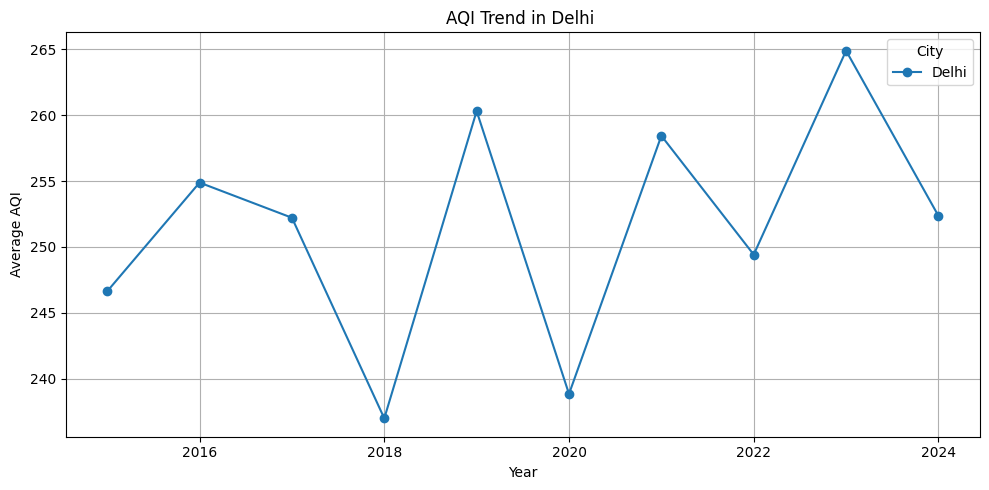

In [ ]:
metro = df[df['City'].isin(['Delhi'])]
trend = metro.groupby(['Year', 'City'])['AQI'].mean().unstack()

print("AQI Trend:\n", trend)

# Visualization
trend.plot(marker='o', figsize=(10, 5))
plt.title("AQI Trend in Delhi ")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()


5. Standard Deviation of PM10 across Cities

Standard Deviation of PM10 across Cities:

City
Kolkata      175.363163
Bangalore    174.202200
Chennai      173.641380
Delhi        173.612683
Mumbai       170.421374
Name: PM10, dtype: float64


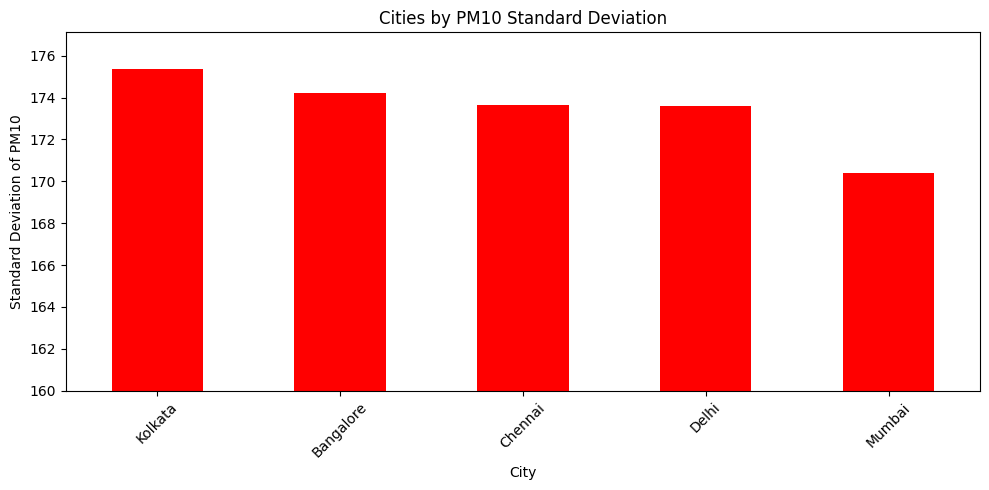

In [ ]:
# Calculate standard deviation of PM10 per city
pm10_std = df.groupby('City')['PM10'].apply(np.std).sort_values(ascending=False).head()

print("Standard Deviation of PM10 across Cities:\n")
print(pm10_std)

# Visualization of top 5 cities by PM10 standard deviation
pm10_std.plot(kind='bar', figsize=(10, 5), color='red')  # Removed the typo here
plt.title("Cities by PM10 Standard Deviation")
plt.ylabel("Standard Deviation of PM10")
plt.ylim(160, pm10_std.max()*1.01)  # Use full max from top 5
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Visualization**

6. PM2.5 and NO2 levels over time in Delhi

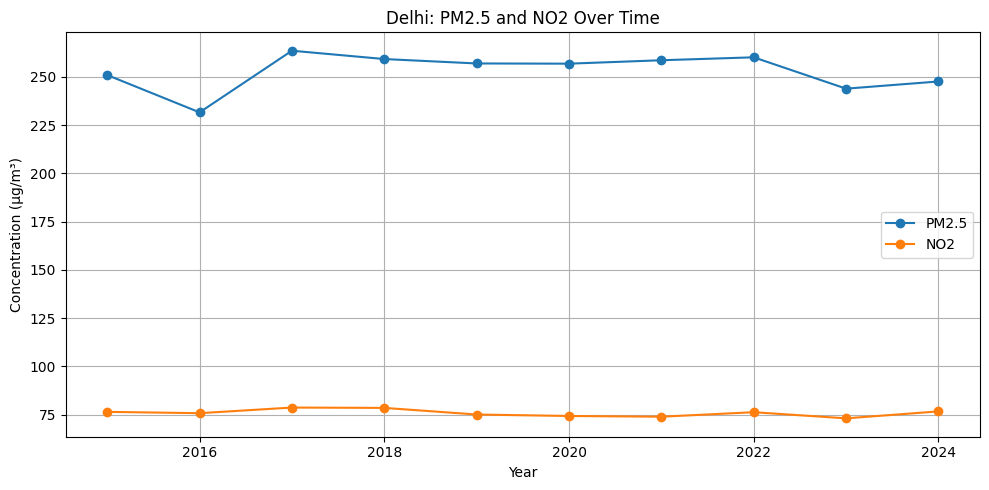

In [ ]:
delhi = df[df['City'] == 'Delhi'].groupby('Year')[['PM2.5', 'NO2']].mean()
delhi.plot(marker='o', figsize=(10, 5))
plt.title("Delhi: PM2.5 and NO2 Over Time")
plt.ylabel("Concentration (μg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()


7. Compare average AQI values across metro cities

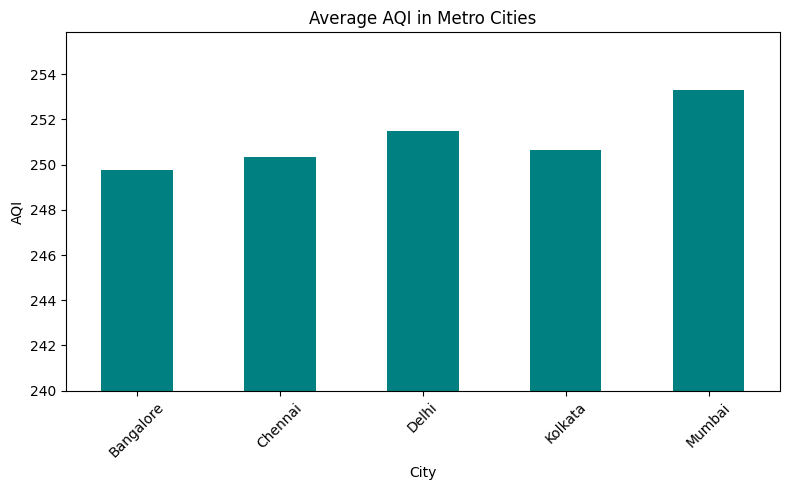

In [ ]:
metro_cities = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bangalore']
metro_avg = df[df['City'].isin(metro_cities)].groupby('City')['AQI'].mean()

metro_avg.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title("Average AQI in Metro Cities")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.ylim(240, metro_avg.max()*1.01)
plt.tight_layout()
plt.show()


8.  Display pollutant composition in a city (Pie chart)

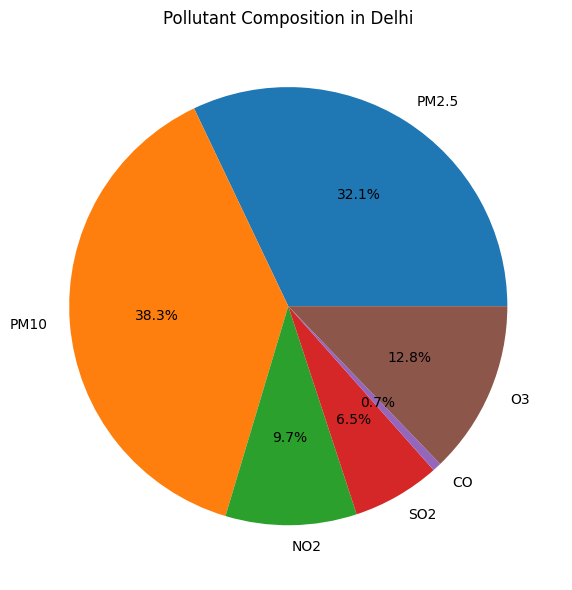

In [ ]:
pollutants_avg = df[df['City'] == 'Bangalore'][['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].mean()
pollutants_avg.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), legend=False)
plt.title("Pollutant Composition in Delhi")
plt.ylabel("")
plt.tight_layout()
plt.show()


9.  Plot the distribution of PM2.5 using a histogram

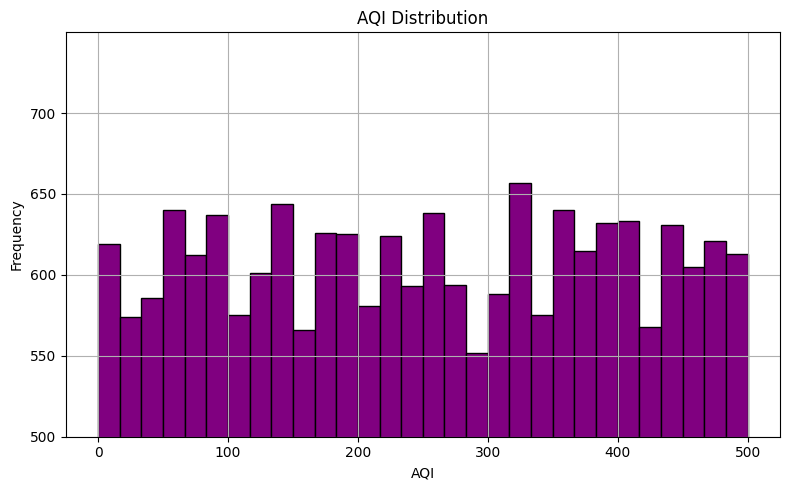

In [ ]:
pm25=df['PM2.5']
pm25.plot(kind='hist', bins=30, color='purple', edgecolor='black', figsize=(8, 5))
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.grid(True)
plt.ylim(500, pm25.max()*1.5)
plt.tight_layout()
plt.show()


10.

<Figure size 1000x600 with 0 Axes>

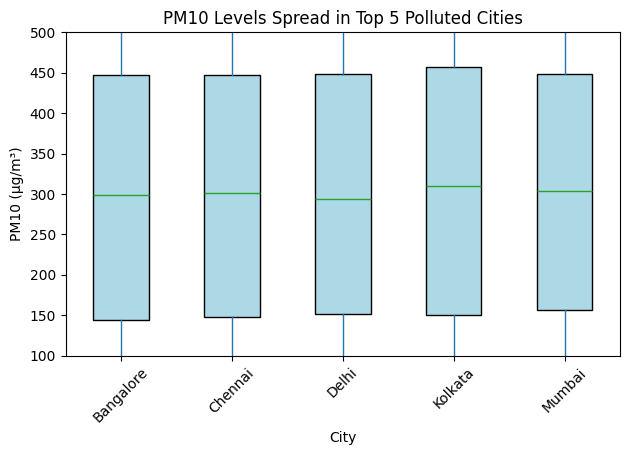

In [ ]:
# Box Plot for PM10
top_pm10_cities = df.groupby('City')['PM10'].mean().sort_values(ascending=False).head(5).index
box_data = df[df['City'].isin(top_pm10_cities)]

plt.figure(figsize=(10, 6))
box_data.boxplot(column='PM10', by='City', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("PM10 Levels Spread in Top 5 Polluted Cities")
plt.suptitle("")  # Remove automatic title
plt.ylabel("PM10 (μg/m³)")
plt.xticks(rotation=45)
plt.ylim(100,500)
plt.tight_layout()
plt.show()


# Statistical Analysis

a) Descriptive Statistics

In [ ]:
city_stats = df.groupby("City")[ ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']].describe()
print(city_stats)

            PM2.5                                                           \
            count        mean         std  min    25%    50%    75%    max   
City                                                                         
Bangalore  3653.0  248.546838  144.749067  0.0  122.2  248.8  375.3  499.9   
Chennai    3653.0  252.515138  145.428330  0.2  126.2  254.0  380.4  499.9   
Delhi      3653.0  252.905858  141.858046  0.2  130.0  255.4  374.3  499.8   
Kolkata    3653.0  250.456885  144.981865  0.3  125.3  249.5  375.1  499.8   
Mumbai     3653.0  248.563756  145.272944  0.2  123.7  247.0  376.4  499.8   

             PM10              ...     O3            AQI              \
            count        mean  ...    75%    max   count        mean   
City                           ...                                     
Bangalore  3653.0  296.769888  ...  149.5  200.0  3653.0  249.767397   
Chennai    3653.0  297.990337  ...  148.3  200.0  3653.0  250.338763   
Delhi      3653

b) Detect Outliers Using Z-Score (for PM2.5)

In [ ]:
from scipy.stats import zscore

# Drop NA and compute Z-score
df_clean = df[['City', 'PM2.5']].dropna()
df_clean['zscore_pm25'] = zscore(df_clean['PM2.5'])

# Outliers: |Z| > 3
outliers = df_clean[np.abs(df_clean['zscore_pm25']) > 3]
print("Outliers in PM2.5 (Z-Score method):")
print(outliers.head())


Outliers in PM2.5 (Z-Score method):
Empty DataFrame
Columns: [City, PM2.5, zscore_pm25]
Index: []


c) Top Pollutant Contributor Per City

In [ ]:
# Average pollutant levels by city
city_pollutant_means = df.groupby('City')[pollutants[:-1]]  # exclude AQI
top_pollutants = city_pollutant_means.mean().idxmax(axis=1)

print("Top Contributing Pollutant Per City:")
print(top_pollutants)

Top Contributing Pollutant Per City:
City
Bangalore    PM10
Chennai      PM10
Delhi        PM10
Kolkata      PM10
Mumbai       PM10
dtype: object


In [ ]:
# Average pollutant levels by city
city_pollutant_means = df.groupby('City')[pollutants[:-1]]  # exclude AQI
top_pollutants = city_pollutant_means.mean().idxmax(axis=0)

print("High % of pollutant among cities:")
print(top_pollutants)

High % of pollutant among cities:
PM2.5        Delhi
PM10       Kolkata
NO2          Delhi
SO2      Bangalore
CO       Bangalore
O3         Kolkata
dtype: object
